## AXON: Some benchmarks

In [13]:
import json
import axon

try:
    import yaml
    use_yaml = 1
except:
    use_yaml = 0
        
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import gc

import sys; print(sys.version)

2.7.10 (v2.7.10:15c95b7d81dc, May 23 2015, 09:33:12) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


In [2]:
def random_string(n):
    text = ''.join(chr(ord('a')+random.randint(1,20)) for i in range(20))
    text = axon.as_unicode(text)
    return text

In [3]:
yaml_times_dump = []
json_times_dump = []
axon_times_dump = []
yaml_times_load = []
json_times_load = []
axon_times_load = []

def make_test(data):
    if type(data) == dict:
        data = [data]

    t0 = time.time()
    axon_text = axon.dumps(data, sorted=0)
    dt_axon_dump = time.time() - t0
    axon_times_dump.append(dt_axon_dump)
    
    t0 = time.time()
    v = axon.loads(axon_text)
    dt_axon_load = time.time() - t0
    axon_times_load.append(dt_axon_load)
    
    t0 = time.time()
    json_text = json.dumps(data)
    dt_json_dump = time.time() - t0
    json_times_dump.append(dt_json_dump)

    t0 = time.time()
    v = json.loads(json_text)
    dt_json_load = time.time() - t0
    json_times_load.append(dt_json_load)

    if use_yaml:
        t0 = time.time()
        yaml_text = yaml.dump(data, Dumper=yaml.CDumper)
        dt_yaml_dump = time.time() - t0
        yaml_times_dump.append(dt_yaml_dump)
    
        t0 = time.time()
        v = yaml.load(json_text, Loader=yaml.CLoader)
        dt_yaml_load = time.time() - t0
        yaml_times_load.append(dt_yaml_load)
    else:
        dt_yaml_dump, dt_yaml_load = float('nan'), float('nan')
    
    print('Dump:: axon: %.3f json: %.3f yaml: %.3f' % (dt_axon_dump, dt_json_dump, dt_yaml_dump))
    print('Load:: axon: %.3f json: %.3f yaml: %.3f' % (dt_axon_load, dt_json_load, dt_yaml_load))

In [4]:
def test_1():
    lst = []
    for i in range(4000):
        lst.append([
            random_string(8), random.random(),
            random_string(8), random.randint(1,99999),
            random_string(8), random_string(32),
            random_string(8), random.random(),
            random_string(8), random.randint(1,99999),
            random_string(8), random_string(32),
            random_string(8), random.random(),
            random_string(8), random.randint(1,99999),
            random_string(8), random_string(32),
            random_string(8), random.random(),
            random_string(8), random.randint(1,99999),
            random_string(8), random_string(32),
        ])
    return lst

make_test(test_1())        

Dump:: axon: 0.088 json: 0.037 yaml: 2.171
Load:: axon: 0.043 json: 0.042 yaml: 1.725


In [5]:
def test_2():
    lst = []
    for i in range(4000):
        lst.append({
            random_string(8): random.random(),
            random_string(8): random.randint(1,99999),
            random_string(8): random_string(32),
            random_string(8): random.random(),
            random_string(8): random.randint(1,99999),
            random_string(8): random_string(32),
            random_string(8): random.random(),
            random_string(8): random.randint(1,99999),
            random_string(8): random_string(32),
            random_string(8): random.random(),
            random_string(8): random.randint(1,99999),
            random_string(8): random_string(32),
        })
    return lst

make_test(test_2())    

Dump:: axon: 0.044 json: 0.040 yaml: 1.739
Load:: axon: 0.029 json: 0.054 yaml: 1.742


In [6]:
def test_3():
    d = {}
    for j in range(100):
        lst = []
        for i in range(100):
            lst.append({
                random_string(8): random.random(),
                random_string(8): random.randint(1,99999),
                random_string(8): random_string(32),
                random_string(8): random.random(),
                random_string(8): random.randint(1,99999),
                random_string(8): random_string(32),
                random_string(8): random.random(),
                random_string(8): random.randint(1,99999),
                random_string(8): random_string(32),
            })
        d[random_string(8)] = lst
    return d

make_test(test_3()) 

Dump:: axon: 0.088 json: 0.077 yaml: 3.373
Load:: axon: 0.085 json: 0.113 yaml: 3.228


In [7]:
def test_4():
    lst = []
    for i in range(4000):
        lst.append([
            random_string(8), random_string(32),
            random_string(32), random_string(8),
            random_string(8), random_string(32),
            random_string(32), random_string(32),
            random_string(8), random_string(8),
            random_string(32), random_string(32),
            random_string(8), random_string(8),
            random_string(32), random_string(8),
            random_string(8), random_string(32),
            random_string(32), random_string(8),
            random_string(8), random_string(8),
            random_string(32), random_string(32),
            random_string(8), random_string(8),
            random_string(32), random_string(8),
            random_string(8), random_string(32),
        ])
    return lst

make_test(test_4()) 

Dump:: axon: 0.034 json: 0.028 yaml: 1.947
Load:: axon: 0.032 json: 0.058 yaml: 1.640


In [8]:
def test_5():
    lst = []
    for i in range(5000):
        lst.extend([
            random_string(8), random_string(8),
            random_string(32), random_string(8),
            random_string(32), random_string(32),
            random_string(8), random_string(8),
            random_string(8), random_string(8),
            random_string(32), random_string(8),
            random_string(8), random_string(32),
            random_string(32), random_string(8),
            random_string(32), random_string(32),
            random_string(8), random_string(8),
            random_string(32), random_string(8),
            random_string(32), random_string(32),
        ])
    return lst

make_test(test_5()) 

Dump:: axon: 0.048 json: 0.026 yaml: 2.096
Load:: axon: 0.036 json: 0.047 yaml: 1.624


In [9]:
def test_6():
    lst = []
    for i in range(5000):
        lst.extend([
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
            random.randint(1,99999), random.randint(1,99999),
        ])
    lst = [lst]
    return lst

make_test(test_6()) 

Dump:: axon: 0.023 json: 0.013 yaml: 1.875
Load:: axon: 0.026 json: 0.018 yaml: 2.071


In [10]:
def test_7():
    lst = []
    for i in range(5000):
        lst.extend([
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
            random.random(), random.random(),
        ])
    lst = [lst]
    return lst

make_test(test_7())     

Dump:: axon: 0.081 json: 0.143 yaml: 2.563
Load:: axon: 0.040 json: 0.049 yaml: 2.350


Dumping:
('axon:', ['0.088', '0.044', '0.088', '0.034', '0.048', '0.023', '0.081'])
('json:', ['0.037', '0.040', '0.077', '0.028', '0.026', '0.013', '0.143'])
('yaml:', ['2.171', '1.739', '3.373', '1.947', '2.096', '1.875', '2.563'])
Loading:
('axon:', ['0.043', '0.029', '0.085', '0.032', '0.036', '0.026', '0.040'])
('json:', ['0.042', '0.054', '0.113', '0.058', '0.047', '0.018', '0.049'])
('yaml:', ['1.725', '1.742', '3.228', '1.640', '1.624', '2.071', '2.350'])


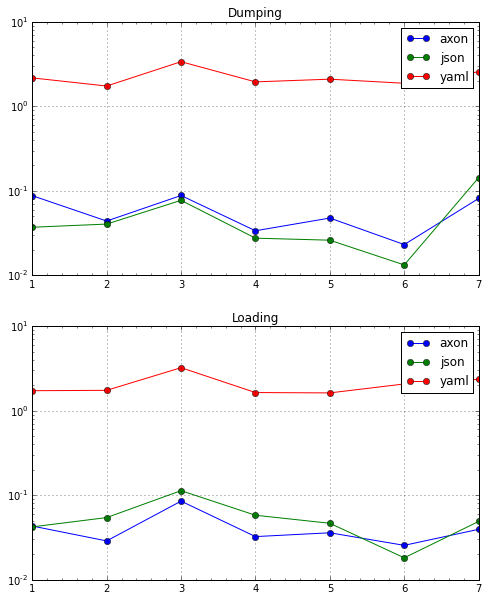

In [12]:
def make_plot():
    tests = range(1,len(axon_times_dump)+1)
    plt.figure(figsize=(8.0, 10.0))
    
    plt.subplot(2,1,1)
    plt.title('Dumping')
    plt.plot(tests, axon_times_dump, label='axon', marker='o')
    plt.plot(tests, json_times_dump, label='json', marker='o')
    if use_yaml:
        plt.plot(tests, yaml_times_dump, label='yaml', marker='o')
    plt.legend()
    plt.grid()
    plt.semilogy()
    plt.minorticks_on()
    
    plt.subplot(2,1,2)
    plt.title('Loading')
    plt.plot(tests, axon_times_load, label='axon', marker='o')
    plt.plot(tests, json_times_load, label='json', marker='o')
    if use_yaml:
        plt.plot(tests, yaml_times_load, label='yaml', marker='o')
    plt.legend()
    plt.semilogy()
    plt.grid()
    plt.minorticks_on()

print('Dumping:')
print('axon:', [('%.3f' % t) for t in axon_times_dump])
print('json:', [('%.3f' % t) for t in json_times_dump])
if use_yaml:
    print('yaml:', [('%.3f' % t) for t in yaml_times_dump])
print('Loading:')
print('axon:', [('%.3f' % t) for t in axon_times_load])
print('json:', [('%.3f' % t) for t in json_times_load])
if use_yaml:
    print('yaml:', [('%.3f' % t) for t in yaml_times_load])
make_plot()